**Exercise 1: Implementing a Box Filter**
Write a program to apply a 3x3 box filter (simple averaging filter) on an image.

Use OpenCV to load an image and then apply a box filter to blur the image. Students should implement both manual convolution using a 3x3 kernel and use cv2.blur() to verify the results.
Then use the filter with different kernel sizes (e.g., 5x5, 7x7) and observe the effects.


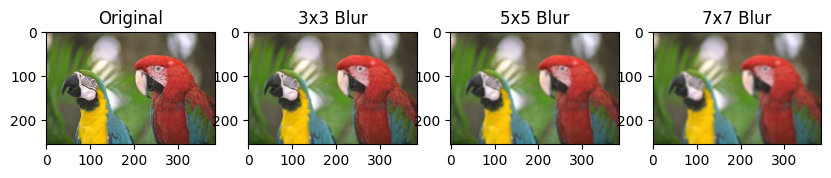

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/parrot (1).jpg')

# Apply box filter with different kernel sizes
blur3 = cv2.blur(image, (3, 3))
blur5 = cv2.blur(image, (5, 5))
blur7 = cv2.blur(image, (7, 7))

# Display the images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(141), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(142), plt.imshow(cv2.cvtColor(blur3, cv2.COLOR_BGR2RGB)), plt.title('3x3 Blur')
plt.subplot(143), plt.imshow(cv2.cvtColor(blur5, cv2.COLOR_BGR2RGB)), plt.title('5x5 Blur')
plt.subplot(144), plt.imshow(cv2.cvtColor(blur7, cv2.COLOR_BGR2RGB)), plt.title('7x7 Blur')

plt.show()

**Exercise 2: Applying a Gaussian Filter for Noise Reduction**
Use OpenCV to apply a Gaussian filter to reduce Gaussian noise in an image.

Start with an image that has Gaussian noise added using cv2.randn(). Then, apply cv2.GaussianBlur() to reduce the noise. Compare the results of different kernel sizes (e.g., 3x3, 7x7) and sigma values.


(<Axes: title={'center': 'Blur 7x7, sigma=50'}>,
 Text(0.5, 1.0, 'Blur 7x7, sigma=50'))

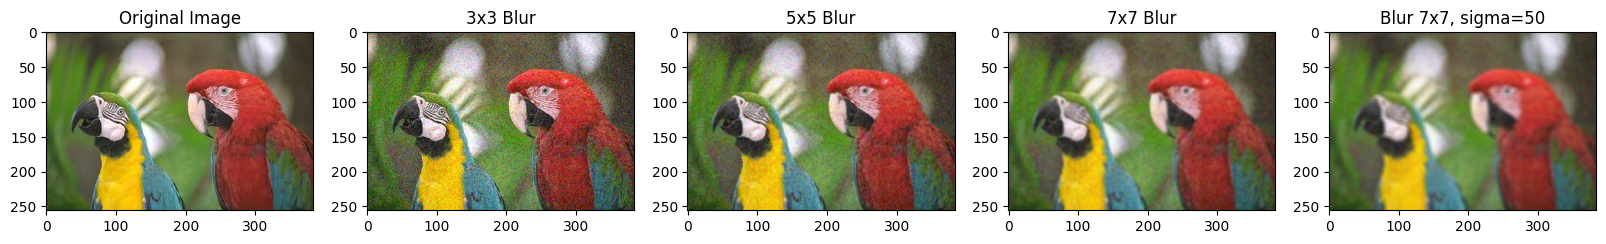

In [ ]:
import cv2
import numpy as np

# Add Gaussian noise
def add_gaussian_noise(image):
    row, col, ch = image.shape
    mean = 0
    sigma = 25
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = image + gauss.reshape(row, col, ch)
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Load the image
image = cv2.imread('/content/parrot (1).jpg')

# Add noise
noisy_image = add_gaussian_noise(image)

# Apply Gaussian blur with different kernels and sigma values
blur3 = cv2.GaussianBlur(noisy_image, (3, 3), 0)
blur7 = cv2.GaussianBlur(noisy_image, (7, 7), 0)
blur7_sigma50 = cv2.GaussianBlur(noisy_image, (7, 7), 50)

# Display the images using Matplotlib
plt.figure(figsize=(20, 5))

plt.subplot(151), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(152), plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)), plt.title('3x3 Blur')
plt.subplot(153), plt.imshow(cv2.cvtColor(blur3, cv2.COLOR_BGR2RGB)), plt.title('5x5 Blur')
plt.subplot(154), plt.imshow(cv2.cvtColor(blur7, cv2.COLOR_BGR2RGB)), plt.title('7x7 Blur')
plt.subplot(155), plt.imshow(cv2.cvtColor(blur7_sigma50, cv2.COLOR_BGR2RGB)), plt.title('Blur 7x7, sigma=50')


**Exercise 3: Median Filtering for Salt-and-Pepper Noise**
Goal: Write a program to remove salt-and-pepper noise using a median filter.
Guideline: Use OpenCV to add salt-and-pepper noise to an image. Then, apply cv2.medianBlur() with different kernel sizes (e.g., 3x3, 5x5) and analyze how effectively the noise is removed without blurring important image details.


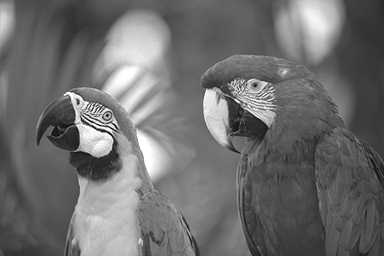

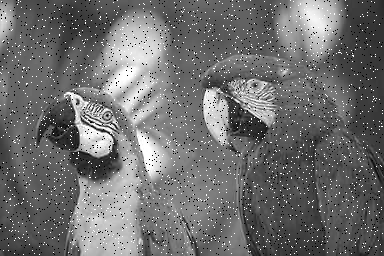

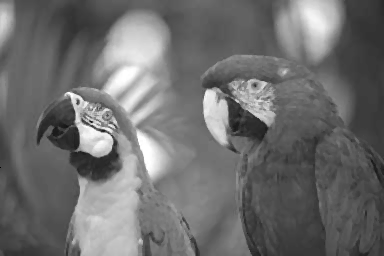

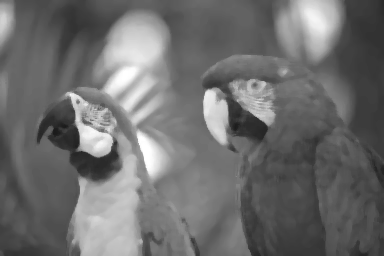

In [ ]:
from google.colab.patches import cv2_imshow
def add_salt_and_pepper_noise(image, prob):
    noisy = np.copy(image)
    black = np.zeros(image.shape, dtype=np.uint8)
    white = 255 * np.ones(image.shape, dtype=np.uint8)
    num_salt = np.ceil(prob * image.size * 0.5)
    num_pepper = np.ceil(prob * image.size * 0.5)

    # Add Salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # Add Pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

# Load the image in grayscale
image = cv2.imread('/content/parrot (1).jpg', cv2.IMREAD_GRAYSCALE)

# Add noise
noisy_image = add_salt_and_pepper_noise(image, 0.05)

# Apply median filter with different kernel sizes
median3 = cv2.medianBlur(noisy_image, 3)
median5 = cv2.medianBlur(noisy_image, 5)

# Display the images
cv2_imshow(image)
cv2_imshow(noisy_image)
cv2_imshow(median3)
cv2_imshow(median5)



**Exercise 10: Applying Different Noise Types and Evaluating Filters**
Add different types of noise (Gaussian noise, salt-and-pepper noise) and test multiple filters to evaluate their effectiveness in noise reduction.
Use OpenCV to:
Add Gaussian noise: np.random.normal()
Add Salt-and-pepper noise: Randomly assign 0 or 255 to pixels.

Then, apply median filtering, Gaussian filtering, and box filtering to the noisy image. Compare which filter is best for each noise type.

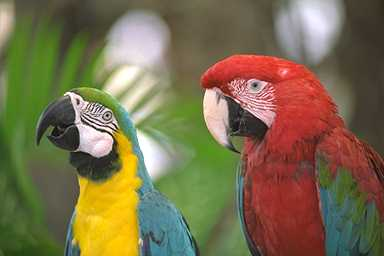

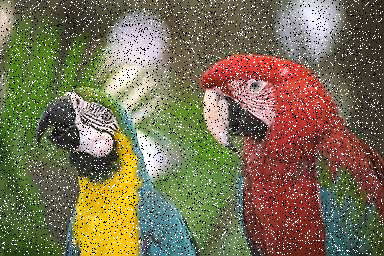

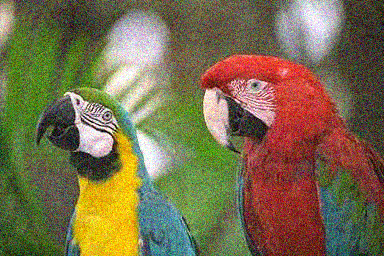

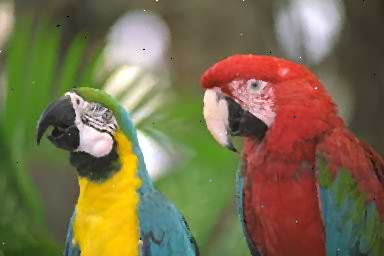

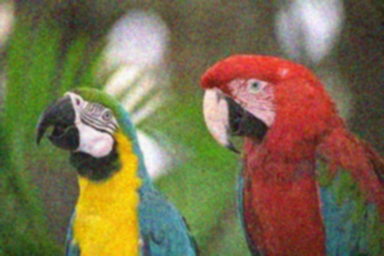

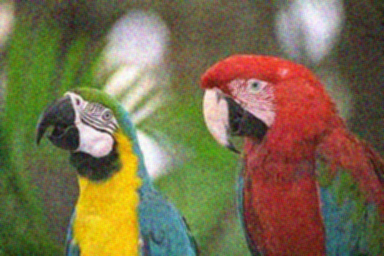

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Add Gaussian noise to the image
def add_gaussian_noise(image):
    row, col, ch = image.shape
    mean = 0
    sigma = 25
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = image + gauss.reshape(row, col, ch)
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Add salt-and-pepper noise to the image
def add_salt_and_pepper_noise(image, prob):
    noisy = np.copy(image)
    black = np.zeros(image.shape, dtype=np.uint8)
    white = 255 * np.ones(image.shape, dtype=np.uint8)
    num_salt = np.ceil(prob * image.size * 0.5)
    num_pepper = np.ceil(prob * image.size * 0.5)

    # Add Salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # Add Pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

# Load the image
image = cv2.imread('/content/parrot (1).jpg')

# Add Gaussian noise
gaussian_noisy = add_gaussian_noise(image)

# Add salt-and-pepper noise
sp_noisy = add_salt_and_pepper_noise(image, 0.05)

# Apply median filter
median_filtered = cv2.medianBlur(sp_noisy, 3)

# Apply Gaussian filter
gaussian_filtered = cv2.GaussianBlur(gaussian_noisy, (5, 5), 0)

# Apply box filter
box_filtered = cv2.blur(gaussian_noisy, (3, 3))

# Display the images
cv2_imshow(image)
cv2_imshow(sp_noisy)
cv2_imshow(gaussian_noisy)
cv2_imshow( median_filtered)
cv2_imshow(gaussian_filtered)
cv2_imshow(box_filtered)


**Exercise 5: Highpass Filtering for Image Sharpening**
Implement the Laplacian filter using cv2.Laplacian() to sharpen an image. Show how highpass filters emphasize edges by subtracting a blurred version of the image from the original image.


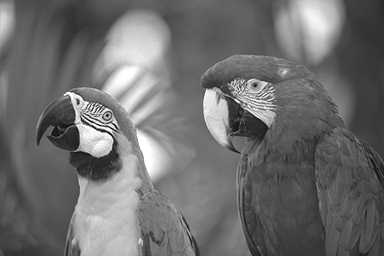

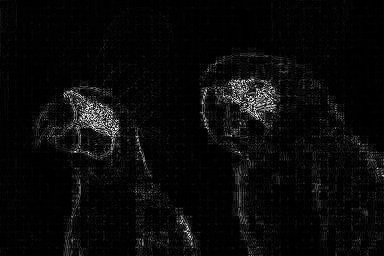

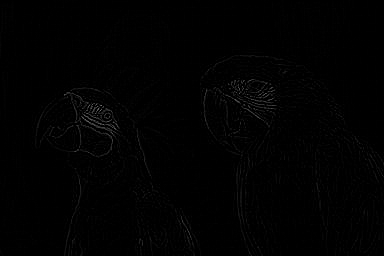

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image in grayscale
image = cv2.imread('/content/parrot (1).jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convert back to uint8
sharpened = np.uint8(np.absolute(laplacian))

# Show the original and sharpened images
cv2_imshow(image)
cv2_imshow(sharpened)

# Apply Gaussian blur for demonstration
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Subtract blurred image from original to emphasize edges
edges = cv2.subtract(image, blurred)

# Show the edges
cv2_imshow(edges)

**Exercise 5: Highpass Filtering with Different Kernels**
Create custom highpass filters like the following:
Kernel 1:      Kernel 2:
0 -1  0       -1 -1 -1
-1  5 -1      -1  9 -1
0 -1  0       -1 -1 -1
Apply these kernels to an image using OpenCV’s cv2.filter2D() and observe how different kernels sharpen the image differently.
Then Apply these kernels to various images and explain how the sharpening changes based on the image content.

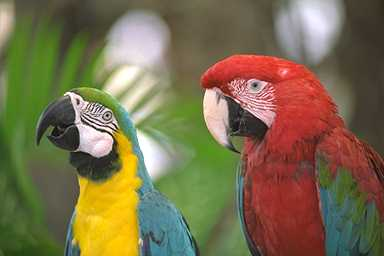

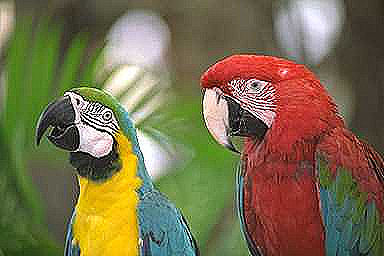

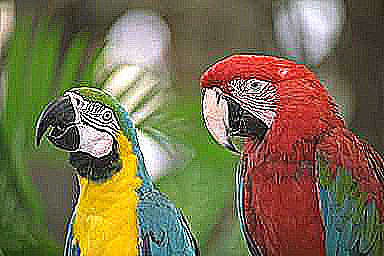

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/parrot (1).jpg')

# Define two different highpass kernels
kernel1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

# Apply filters
sharpened1 = cv2.filter2D(image, -1, kernel1)
sharpened2 = cv2.filter2D(image, -1, kernel2)

# Show images
cv2_imshow(image)
cv2_imshow(sharpened1)
cv2_imshow(sharpened2)

**Exercise: Region-Based Smoothing using Thresholding**
Apply selective smoothing to an image based on region thresholds using cv2.threshold().

Syntax: retval, mask = cv2.threshold(src, thresh, maxval, type)

    * src: The source image (grayscale)
    * thresh: The threshold value.
    * maxval: The maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV types.
    * type: The type of thresholding to apply (e.g.,THRESH_BINARY, THRESH_BINARY_INV, THRESH_TRUNC, etc.).


Use a smoothing filter only on certain regions of an image that meet a threshold criterion (e.g., smooth all pixels with intensity less than 100). This could be useful for applications like background blurring. use the following code and experiment with different threshold values and observe results

In [ ]:
import cv2
import numpy as np

# Load the image in grayscale
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to select regions for smoothing
_, mask = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)

# Create a Gaussian blurred version of the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply smoothing only to regions where the mask is true
result = np.where(mask==255, blurred, image)

# Show results
cv2.imshow('Original Image', image)
cv2.imshow('Masked Blurred Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


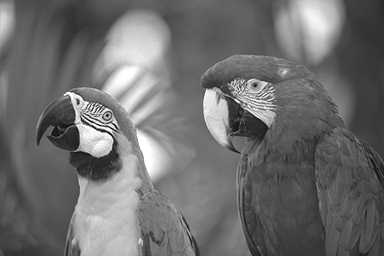

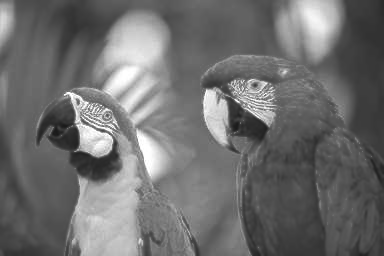

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image in grayscale
image = cv2.imread('/content/parrot (1).jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to select regions for smoothing
_, mask = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)

# Create a Gaussian blurred version of the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply smoothing only to regions where the mask is true
result = np.where(mask==255, blurred, image)

# Show results
cv2_imshow(image)
cv2_imshow(result)